In [1]:
import pandas as pd
import numpy as np

#### Read the 'avocado.csv' with pandas. Make sure a new unnecessary column is not generated.

In [2]:
# TODO
df = pd.read_csv('avocado.csv')

#### Explore the dataset, pay attention to redundancies, note the categorical (non-numeric) variables.

In [63]:
# TODO
df.head()
df.columns


Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

#### Drop the unnecessary columns, if any. 

In [4]:
# TODO
df = df.drop(['Unnamed: 0', 'Date'], axis='columns')

#### Choose the 'AveragePrice' column as your target (y) variable.

In [5]:
# TODO
y = df['AveragePrice']


#### Plot the relationship of each of the numerical features with the target variable

In [6]:
import matplotlib.pyplot as plt

Text(153.125, 0.5, 'AveragePrice')

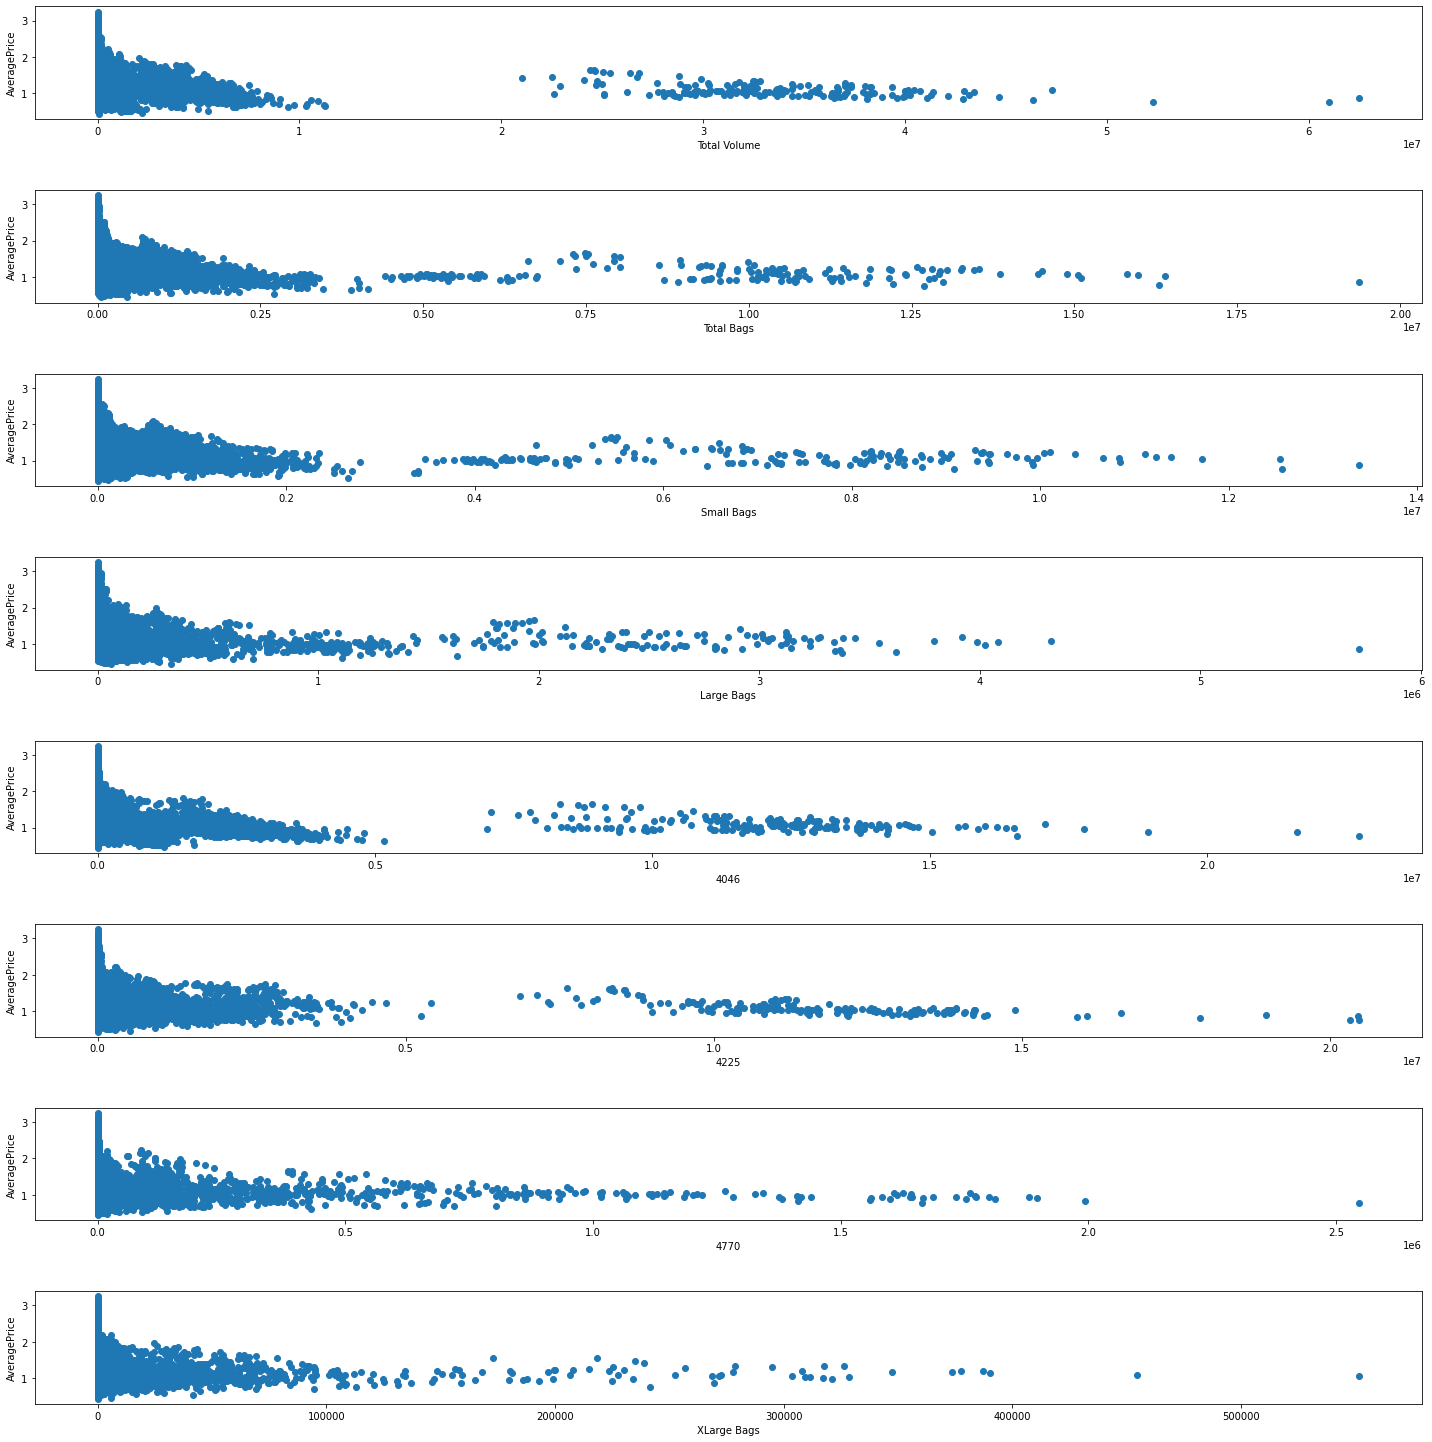

In [257]:
fig, axs = plt.subplots(8, 1, figsize=(20,20))
# fig.set_figwidth(15)
# fig.set_figheight(20)
fig.tight_layout(h_pad=5)

axs[0].scatter(df['Total Volume'], df['AveragePrice'])
axs[0].set_xlabel('Total Volume')
axs[0].set_ylabel('AveragePrice')

axs[1].scatter(df['Total Bags'], df['AveragePrice'])
axs[1].set_xlabel('Total Bags')
axs[1].set_ylabel('AveragePrice')

axs[2].scatter(df['Small Bags'], df['AveragePrice'])
axs[2].set_xlabel('Small Bags')
axs[2].set_ylabel('AveragePrice')

axs[3].scatter(df['Large Bags'], df['AveragePrice'])
axs[3].set_xlabel('Large Bags')
axs[3].set_ylabel('AveragePrice')

axs[4].scatter(df['4046'], df['AveragePrice'])
axs[4].set_xlabel('4046')
axs[4].set_ylabel('AveragePrice')

axs[5].scatter(df['4225'], df['AveragePrice'])
axs[5].set_xlabel('4225')
axs[5].set_ylabel('AveragePrice')

axs[6].scatter(df['4770'], df['AveragePrice'])
axs[6].set_xlabel('4770')
axs[6].set_ylabel('AveragePrice')

axs[7].scatter(df['XLarge Bags'], df['AveragePrice'])
axs[7].set_xlabel('XLarge Bags')
axs[7].set_ylabel('AveragePrice')

#### Convert categorical variables to numeric. 
#### Note: variables with little amount of unique values are better to be considered categoricals.

In [28]:
# TODO
df_encoded = pd.get_dummies(df)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,...,0,0,0,0,0,0,0,0,0,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,...,0,0,0,0,0,0,0,0,0,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,...,0,0,0,0,0,0,0,0,0,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,...,0,0,0,0,0,0,0,0,0,1


#### Devide data into Train and Test sets with the ratio 80:20.

In [137]:
# TODO
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df_encoded[df_encoded.columns.difference(['AveragePrice'])], y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

#### Choose 5 most relevant features from dataset with 'Forward Selection' (find in your slides).

In [262]:
!pip install mlxtend
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
model = LinearRegression()
forward_m = sfs(model, k_features=5, verbose=2, forward=True)
forward = forward_m.fit(df_encoded[df_encoded.columns.difference(['AveragePrice'])], y)
# forward2 = forward_m.fit(xTrain1, yTrain1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.5s finished

[2021-12-03 18:15:11] Features: 1/5 -- score: -0.014224007308957143[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.7s finished

[2021-12-03 18:15:12] Features: 2/5 -- score: 0.025929465301701326[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    0.8s finished

[2021-12-03 18:15:13] Features: 3/5 -- score: 0.053212142532615456[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Do

In [260]:
names_forward = np.array(forward.k_feature_names_)
names_forward


array(['region_DallasFtWorth', 'region_HartfordSpringfield',
       'region_NewYork', 'type_organic', 'year'], dtype='<U26')

#### Choose 5 most relevant features from dataset with 'Backward Selection' (find in your slides).

In [40]:
# TODO
backward = sfs(model, k_features=5, verbose=2, forward=False)
backward = backward.fit(xTrain, yTrain)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:   17.6s finished

[2021-12-02 16:00:45] Features: 64/5 -- score: 0.5561688147361867[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:   13.5s finished

[2021-12-02 16:00:58] Features: 63/5 -- score: 0.5561569934016988[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    9.6s finished

[2021-12-02 16:01:08] Features: 62/5 -- score: 0.5561127674392387[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    4.3s finished

[2021-12-02 16:04:31] Features: 36/5 -- score: 0.5467423776325923[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    3.2s finished

[2021-12-02 16:04:34] Features: 35/5 -- score: 0.5456086445587377[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    2.3s finished

[2021-12-02 16:04:37] Features: 34/5 -- score: 0.544423027841208[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    3.1s finished

[2021-12-02 16:04:40] Features: 33/5 --

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2021-12-02 16:05:12] Features: 8/5 -- score: 0.475911706518111[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2021-12-02 16:05:12] Features: 7/5 -- score: 0.4678852932324249[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2021-12-02 16:05:13] Features: 6/5 -- score: 0.45719135987228227[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished

[2021-12-02 16:05:13] Features: 5/5 -- sc

In [41]:
names_backward = np.array(backward.k_feature_names_)
names_backward

array(['region_HartfordSpringfield', 'region_Houston', 'region_NewYork',
       'region_SanFrancisco', 'type_conventional'], dtype='<U26')

#### Choose only features for further which occur in both previous results.

In [42]:
# TODO
rev = np.intersect1d(names_forward, names_backward)
rev

array(['region_HartfordSpringfield', 'region_Houston', 'region_NewYork',
       'region_SanFrancisco', 'type_conventional'], dtype='<U26')

#### Implement the function `fit_1d_linear_regression` that takes a matrix $x$ and a vector $y$, and returns a numpy array , where the first element $\beta_0$ is the intercept of the line, and remainings are the coefficients of a features, like $\beta_1$, $\beta_2$, etc.

In [275]:
import numpy as np
from numpy.linalg import inv

def fit_1d_linear_regression(data_vector, response_vector):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    
    Note: You can avoid the intercept for simplicity 
    or include the intercept for an extra point
    """
    tmp = np.hstack([np.ones((data_vector.shape[0], 1)), data_vector])
    return inv(tmp.T @ tmp) @ tmp.T @ response_vector

def predict_1(X, y):
    tmp = np.hstack([np.ones((X.shape[0], 1)), X])
    return tmp @ y

In [276]:
ans_1 = fit_1d_linear_regression(df_encoded[rev], y)
pred_1 = predict_1(df_encoded[rev], ans_1)
pred_1

array([1.14255413, 1.14255413, 1.14255413, ..., 1.63850806, 1.63850806,
       1.63850806])

#### Now fit the data to LinearRegression model of sklearn.linear_model.

In [231]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(df_encoded[rev], y)
pred_2 = lin_model.predict(df_encoded[rev])
pred_2

array([1.14255413, 1.14255413, 1.14255413, ..., 1.63850806, 1.63850806,
       1.63850806])

#### Implement the following functions: mean_squared_error, mean_absolute_error, r2_score.
#### Each of them should have 2 vector arguments and return the appropriate score.

In [268]:
def mean_squared_error_1(y, y_hat):
    return ((y-y_hat)*(y-y_hat)).sum() / y.shape[0]

def mean_absolute_error_1(y, y_hat):
    return (np.absolute(y-y_hat)).sum() / y.shape[0]

def r2_score_1(y, y_hat):
    return 1 - mean_squared_error_1(y, y_hat) / mean_squared_error_1(y, y_hat.mean())


In [269]:
mse_m, mae_m, r2_m = mean_squared_error_1(y, pred_1), mean_absolute_error_1(y, pred_1), r2_score_1(y, pred_1)
mae_m

0.23021497290799478

#### Compare the resulting scores of your functions and scores of corresponding sklearn functions. They should be the same.

In [270]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# TODO
mse, mae, r2 = mean_squared_error(y, pred_2), mean_absolute_error(y, pred_2), r2_score(y, pred_2)
mae

0.23021497290799472

In [274]:
mse_m == mse, np.round(mae_m, decimals=15) == np.round(mae, decimals=15), r2_m == r2_m

(True, True, True)